In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
import math
import scipy.integrate as integrate
import scipy.special as special

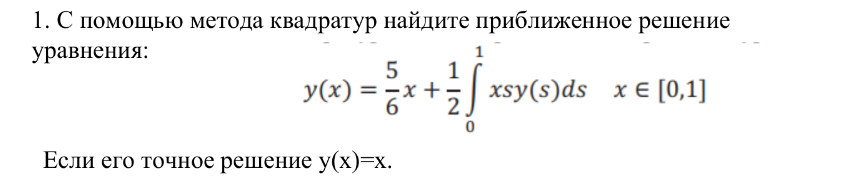

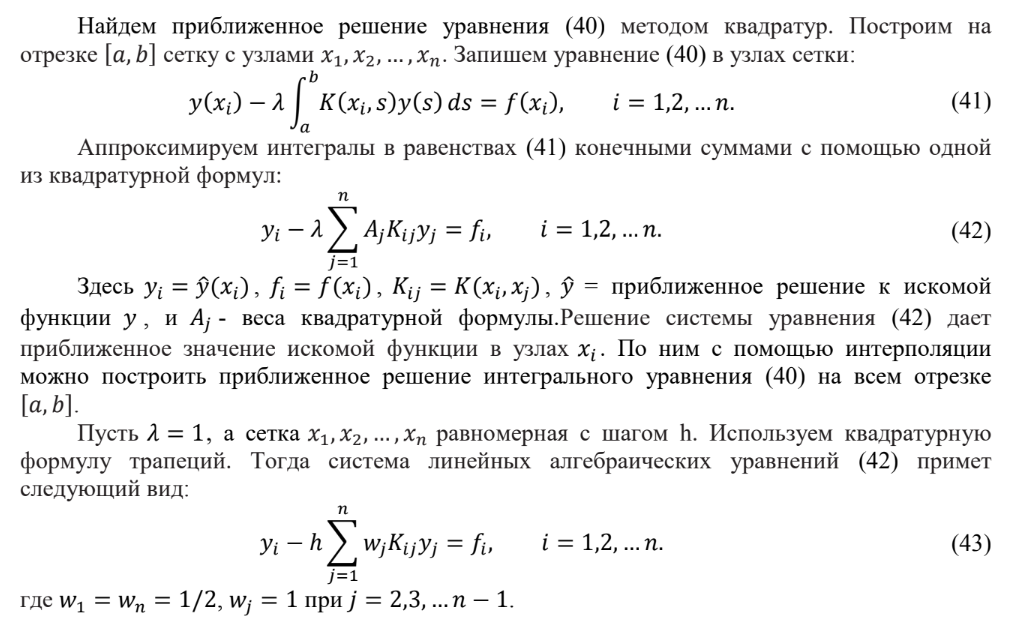

/tmp/ipykernel_7541/2577985073.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][0]=-h*wt*K(x[i],x[0])
/tmp/ipykernel_7541/2577985073.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][j]= -h*wj*K(x[i],x[j])
/tmp/ipykernel_7541/2577985073.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][n-1]= -h*wt*K(x[i],x[n-1])
/tmp/ipykernel_7541/2577985073.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will

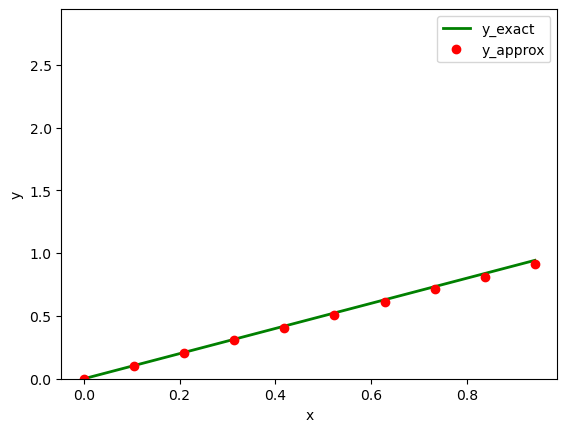

In [32]:
h = math.pi/30
a = 0
b = 1.0001
lam = 0.5

x = np.arange (a, b, h)
x = x.reshape(len(x),1)
n = len(x)

K = lambda x1,s: x1 * s * lam
f = lambda x1: 5*x1/6
y_exact=lambda x1: x1

y=[] # точное решение
for i in range(n):
    y.append([]) # создаем пустую строку
    y[i].append(y_exact(x[i]))

y=np.array(y).reshape(n,1) # точное решение
def Fred_2(K,f,a,b,h):
    x=np.arange (a, b, h)
    x=x.reshape(len(x),1)
    n=len(x)
    wt=1/2
    wj=1
    A=np.zeros((n, n))

    for i in range(n):
        A[i][0]=-h*wt*K(x[i],x[0])
        for j in range(1,n-1,1):
            A[i][j]= -h*wj*K(x[i],x[j])
        A[i][n-1]= -h*wt*K(x[i],x[n-1])
        A[i][i]= A[i][i]+ 1
    B = np.zeros((n,1))
    for j in range(n):
        B[j][0] = f(x[j])

    y=np.linalg.solve(A, B)
    return y

y_approx=Fred_2(K,f,a,b,h)

plt.plot(x,y, '-g',linewidth=2, label='y_exact') # график точного решения
plt.plot(x,y_approx, 'or', label='y_approx') # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+2])
plt.show()



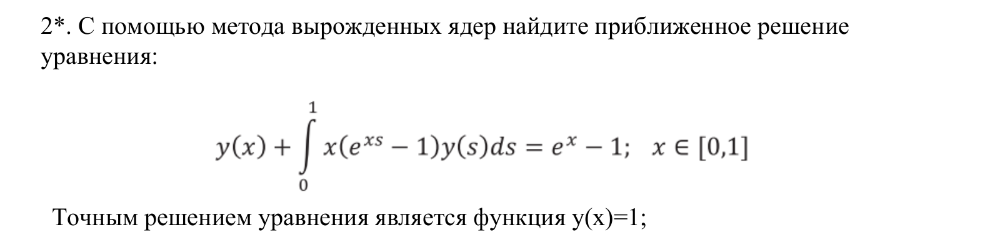
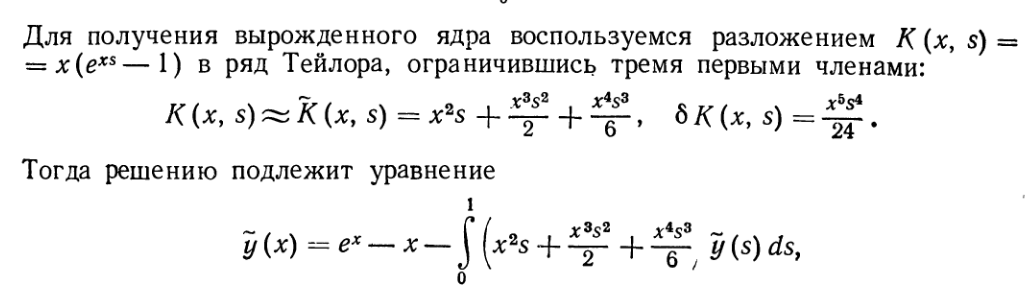
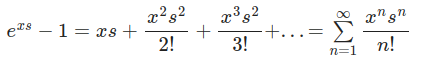

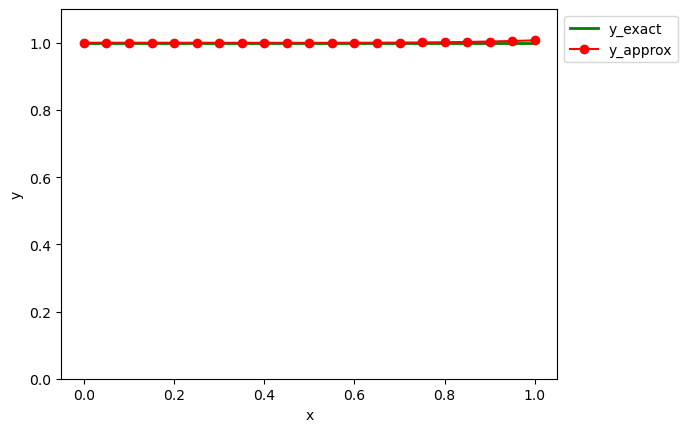

In [36]:
a = 0
b = 1.001
h=0.05
Lambda = -1
x=np.arange (a, b, h)
x=x.reshape(len(x),1)
n=len(x)
alpha = lambda t: [t ** 2, t ** 3, t ** 4]
beta= lambda t: [t, 0.5 * t ** 2, 1 / 6 * t ** 3]

f =lambda t: np.exp(t) - t
y_exact=lambda t: 1 # точное решение
y=[] # точное решение
for i in range(n):
    y.append([]) # создаем пустую строку
    y[i].append(y_exact(x[i]))

y=np.array(y).reshape(n,1) # точное решение

def bfun(t,m,f):
    return beta(t)[m]*f(t)

def Aijfun(t,m,k):
    return beta(t)[m]*alpha(t)[k]

def Solve(f,t,Lambda):
    m=len(alpha(0)) # определяем размер alpha
    M=np.zeros((m,m))
    r=np.zeros((m,1))

    for i in range(m):
        r[i]=integrate.quad(bfun, a, b,args=(i,f))[0]
        for j in range(m):
            M[i][j]=-Lambda*integrate.quad(Aijfun, a, b,args=(i,j))[0]

    for i in range(m):
        M[i][i] =M[i][i]+1
    
    c=np.linalg.solve(M, r)
    aij = np.array(alpha(t))
    return Lambda * (np.sum(c[:, np.newaxis] * aij, axis=0)) + f(t)


y_approx=Solve(f,x,Lambda)
plt.plot(x,y, '-g',linewidth=2, label='y_exact')
plt.plot(x,y_approx, '-or', label='y_approx') 
plt.xlabel("x")
plt.ylabel("y")
plt.legend('1',fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+0.1])
plt.show()

/tmp/ipykernel_7600/2239325650.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][0]=-h*wt*K(x[i],x[0])
/tmp/ipykernel_7600/2239325650.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][j]= -h*wj*K(x[i],x[j])
/tmp/ipykernel_7600/2239325650.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][n-1]= -h*wt*K(x[i],x[n-1])
/tmp/ipykernel_7600/2239325650.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will

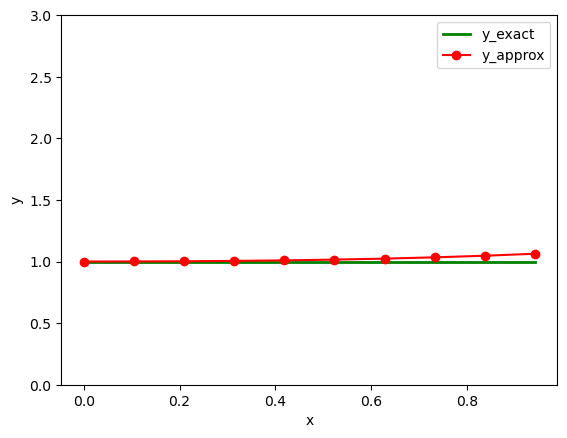

In [ ]:
#скам козулина ради плюсика

h = math.pi/30
a = 0
b = 1.0001
lam = -1

x = np.arange (a, b, h)
x = x.reshape(len(x),1)
n = len(x)

K = lambda x1,s: x1 * (np.exp(x1*s) - 1) * lam
f = lambda x1: (np.exp(x1) - x1)
y_exact=lambda x1: 1

y=[] # точное решение
for i in range(n):
    y.append([]) # создаем пустую строку
    y[i].append(y_exact(x[i]))

y=np.array(y).reshape(n,1) # точное решение
def Fred_2(K,f,a,b,h):
    x=np.arange (a, b, h)
    x=x.reshape(len(x),1)
    n=len(x)
    wt=1/2
    wj=1
    A=np.zeros((n, n))

    for i in range(n):
        A[i][0]=-h*wt*K(x[i],x[0])
        for j in range(1,n-1,1):
            A[i][j]= -h*wj*K(x[i],x[j])
        A[i][n-1]= -h*wt*K(x[i],x[n-1])
        A[i][i]= A[i][i]+ 1
    B = np.zeros((n,1))
    for j in range(n):
        B[j][0] = f(x[j])

    y=np.linalg.solve(A, B)
    return y

y_approx=Fred_2(K,f,a,b,h)

plt.plot(x,y, '-g',linewidth=2, label='y_exact') # график точного решения
plt.plot(x,y_approx, '-or', label='y_approx') # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+2])
plt.show()

